In [34]:
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.callbacks import EarlyStopping,History
from keras.utils import to_categorical
from keras.layers import BatchNormalization,Dense,Convolution2D,Flatten,Activation,MaxPooling2D,Dropout,Conv3D,Conv2D
from keras.optimizers import Adam
import os
import matplotlib
import matplotlib.pyplot as plt
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'sample_submission.csv', 'test']


In [74]:
base='../input'
train=os.path.join(base,'train')
test=os.path.join(base,'test')


In [36]:
def classes_to_int(label):
    # label = classes.index(dir)
    label = label.strip()
    if label == "Black-grass":  return 0
    if label == "Charlock":  return 1
    if label == "Cleavers":  return 2
    if label == "Common Chickweed":  return 3
    if label == "Common wheat":  return 4
    if label == "Fat Hen":  return 5
    if label == "Loose Silky-bent": return 6
    if label == "Maize":  return 7
    if label == "Scentless Mayweed": return 8
    if label == "Shepherds Purse": return 9
    if label == "Small-flowered Cranesbill": return 10
    if label == "Sugar beet": return 11
    print("Invalid Label", label)
    return 12

def int_to_classes(i):
    if i == 0: return "Black-grass"
    elif i == 1: return "Charlock"
    elif i == 2: return "Cleavers"
    elif i == 3: return "Common Chickweed"
    elif i == 4: return "Common wheat"
    elif i == 5: return "Fat Hen"
    elif i == 6: return "Loose Silky-bent"
    elif i == 7: return "Maize"
    elif i == 8: return "Scentless Mayweed"
    elif i == 9: return "Shepherds Purse"
    elif i == 10: return "Small-flowered Cranesbill"
    elif i == 11: return "Sugar beet"
    print("Invalid class ", i)
    return "Invalid Class"

In [37]:
BASE_DATA_FOLDER = "../input"
TRAin_DATA_FOLDER = os.path.join(BASE_DATA_FOLDER, "train")

In [38]:
data=[]
labels=[]
images_per_class={}
# for class_folder_name in os.listdir(train):
#     class_folder_path = os.path.join(train, class_folder_name)
#     class_label = class_folder_name
#     images_per_class[class_label] = []
#     for image_path in glob(os.path.join(class_folder_path, "*.png")):
#         img = load_img(image_path)
#         arr = img_to_array(img)  # Numpy array with shape (233,233,3)
#         arr = cv2.resize(arr, (128,128))
#         data.append(arr)
#         label = classes_to_int(class_label)
#         labels.append(label)
        
##Reading the images and converting toarray
        
images_per_class = {}
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image_bgr = cv2.resize(image_bgr, (128,128))
        data.append(image_bgr)
        labels.append(classes_to_int(class_label))
        images_per_class[class_label].append(image_bgr)

In [39]:
X=np.array(data)
Y=np.array(labels)

In [40]:
def plot_for_class(label):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images_per_class[label][n])
            n += 1 

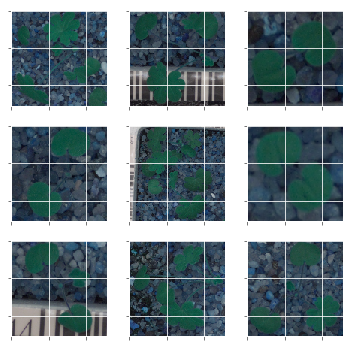

In [41]:
plot_for_class('Small-flowered Cranesbill')

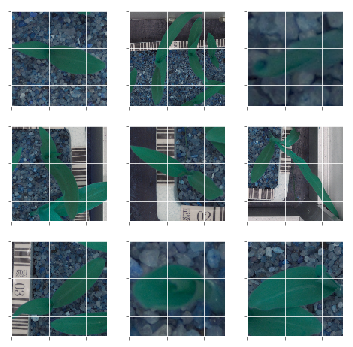

In [42]:
plot_for_class('Maize')

In [43]:
Y =  to_categorical(Y, num_classes=12)

In [44]:
(trainX, valX, trainY, valY) = train_test_split(X,Y,test_size=0.25, random_state=10)

In [49]:
# starting with basic CNN
model=Sequential()
# First conv layer
model.add(Convolution2D(32,3,3,input_shape=(128,128,3)))
model.add(Activation('relu'))
#second conv layer
model.add(Convolution2D(32,3,3,))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3)))
    
# Dropout
model.add(Dropout(0.30))

#fully connected layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dense(12))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stops=keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1,patience=50)

call_backs=[early_stops]
model.fit(trainX,trainY,epochs=15,batch_size=64,validation_data=(valX,valY),callbacks=call_backs)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,...)`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys


Train on 3562 samples, validate on 1188 samples
Epoch 1/15
3562/3562 [==============================] - 3s 926us/step - loss: 15.1912 - acc: 0.0567 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 2/15
3562/3562 [==============================] - 2s 493us/step - loss: 15.1950 - acc: 0.0573 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 3/15
3562/3562 [==============================] - 2s 496us/step - loss: 15.1950 - acc: 0.0573 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 4/15
3562/3562 [==============================] - 2s 494us/step - loss: 15.1950 - acc: 0.0573 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 5/15
3562/3562 [==============================] - 2s 492us/step - loss: 15.1950 - acc: 0.0573 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 6/15
3562/3562 [==============================] - 2s 492us/step - loss: 15.1950 - acc: 0.0573 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 7/15
3562/3562 [==============================] - 2s 491us/step - loss: 15.1950 - acc: 0.0573 - val_loss: 14.9920 - va

In [50]:
img_data = ImageDataGenerator(rotation_range=180, width_shift_range=0.1, \
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,\
    horizontal_flip=True, fill_mode="nearest")

img_data.fit(trainX)

model.fit_generator(img_data.flow(trainX, trainY, batch_size=64), \
    validation_data=(valX, valY), \
    steps_per_epoch=len(trainX) // 32, epochs=20, verbose=1,callbacks=call_backs)

Epoch 1/20
111/111 [==============================] - 27s 245ms/step - loss: 15.1992 - acc: 0.0570 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 2/20
111/111 [==============================] - 27s 244ms/step - loss: 15.1897 - acc: 0.0576 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 3/20
111/111 [==============================] - 27s 245ms/step - loss: 15.1910 - acc: 0.0575 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 4/20
111/111 [==============================] - 27s 245ms/step - loss: 15.1944 - acc: 0.0573 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 5/20
111/111 [==============================] - 27s 244ms/step - loss: 15.2011 - acc: 0.0569 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 6/20
111/111 [==============================] - 27s 243ms/step - loss: 15.1910 - acc: 0.0575 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 7/20
111/111 [==============================] - 27s 247ms/step - loss: 15.1875 - acc: 0.0577 - val_loss: 14.9920 - val_acc: 0.0699
Epoch 8/20
111/111 [=====================

In [51]:
# By seeing above a basic CNN wont sufficient so i am going forward use more layers like maxpooling 
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization_9 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 60, 60, 64)        256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 56, 56, 128)       204928    
__________

In [52]:
model.summary()
call_back=EarlyStopping(patience=5,)
img_data = ImageDataGenerator(rotation_range=180, width_shift_range=0.1, \
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,\
    horizontal_flip=True, fill_mode="nearest")

img_data.fit(trainX)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization_9 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 60, 60, 64)        256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 56, 56, 128)       204928    
__________

In [54]:

H = model.fit_generator(img_data.flow(trainX, trainY, batch_size=64), \
    validation_data=(valX, valY), \
    steps_per_epoch=len(trainX) // 32, epochs=30, verbose=1,callbacks=call_backs)

Epoch 1/30
111/111 [==============================] - 35s 313ms/step - loss: 1.9287 - acc: 0.4178 - val_loss: 2.2859 - val_acc: 0.3906
Epoch 2/30
111/111 [==============================] - 31s 281ms/step - loss: 1.2168 - acc: 0.6004 - val_loss: 3.9150 - val_acc: 0.2466
Epoch 3/30
111/111 [==============================] - 31s 281ms/step - loss: 0.9288 - acc: 0.6927 - val_loss: 3.4684 - val_acc: 0.3392
Epoch 4/30
111/111 [==============================] - 31s 281ms/step - loss: 0.7910 - acc: 0.7340 - val_loss: 1.6065 - val_acc: 0.4806
Epoch 5/30
111/111 [==============================] - 31s 281ms/step - loss: 0.6897 - acc: 0.7686 - val_loss: 1.4212 - val_acc: 0.6187
Epoch 6/30
111/111 [==============================] - 31s 283ms/step - loss: 0.6131 - acc: 0.7930 - val_loss: 7.1566 - val_acc: 0.0918
Epoch 7/30
111/111 [==============================] - 31s 280ms/step - loss: 0.5539 - acc: 0.8141 - val_loss: 3.1587 - val_acc: 0.3965
Epoch 8/30
111/111 [==============================] - 3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  """Entry point for launching an IPython kernel.


[]

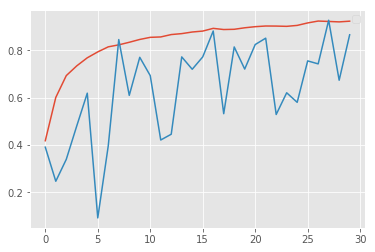

In [55]:
matplotlib.use('Agg')
matplotlib.pyplot.style.use('ggplot')

plt.plot(np.arange(0, 30),H.history['acc'])
plt.plot(np.arange(0, 30),H.history['val_acc'])

plt.legend(loc='upper right')
plt.plot()

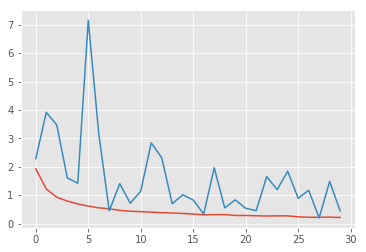

In [56]:
plt.plot(np.arange(0, 30),H.history['loss'])
plt.plot(np.arange(0, 30),H.history['val_loss'])

In [67]:
print("Train accuracy",model.evaluate(trainX,trainY)[1])

3562/3562 [==============================] - 3s 733us/step
Train accuracy 0.8742279618526696


In [69]:
print("test Accuracy",model.evaluate(valX,valY)[1])

1188/1188 [==============================] - 1s 728us/step
test Accuracy 0.8653198653198653


In [75]:

# Kaggel's Part
test_data=[]
images=os.listdir(test)
for i in images:
    image=cv2.imread(test+'/'+i,cv2.IMREAD_COLOR)
    image=cv2.resize(image,(128,128),interpolation = cv2.INTER_AREA)
    test_data.append(image)
test=np.array(test_data)

In [76]:
test_labels=model.predict_classes(test)

In [77]:
test_labels=[int_to_classes(i) for i in test_labels]

In [78]:
submission=pd.DataFrame({'file':images,'species':test_labels})

In [79]:
submission.to_csv('submission.csv',index=False)